<a href="https://colab.research.google.com/github/ashrafhussain17/crime-analysis/blob/main/DLModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn import svm

In [ ]:
def run_PCA(dataset, numberOfComponents):
    df = dataset
    number_of_columns = len(df.columns)
    x = df.iloc[:, 0:number_of_columns - 1].values
    y = df.iloc[:, number_of_columns - 1].values
    x = StandardScaler().fit_transform(x)
    pca = PCA(n_components=numberOfComponents)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(principalComponents)
    print(type(principalDf))
    l = list(i for i in range(numberOfComponents + 1))
    print(l)
    # finalDf = pd.concat([principalDf, pd.DataFrame(y)])
    finalDf = principalDf.assign(yy=y)
    finalDf.columns = l
    return finalDf

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving readydata.csv to readydata.csv


In [ ]:
dataset = pd.read_csv('readydata.csv')

In [ ]:
def generatehistogram(dataset, name):
    # Generate a mask for the upper triangle
    result = dataset.corr()
    mask = np.triu(np.ones_like(result, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(12, 10))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(result, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.savefig(name, dpi=300, bbox_inches='tight')
    plt.show()

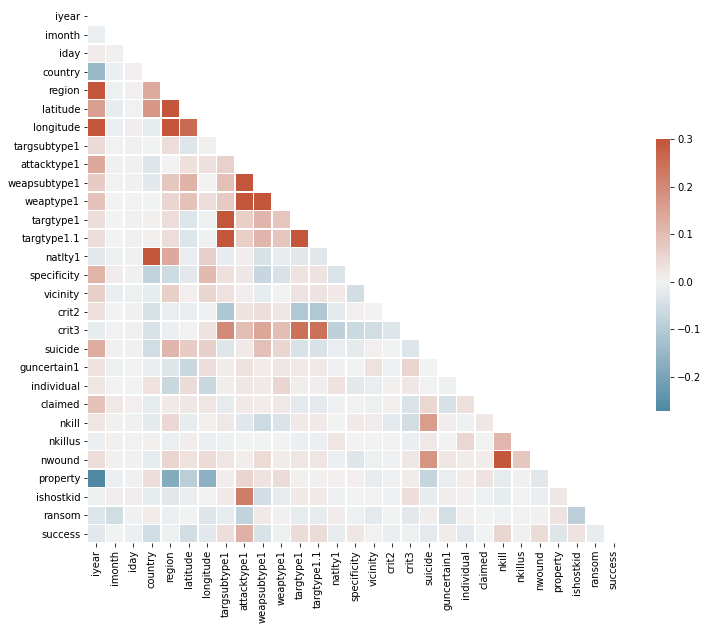

In [ ]:
generatehistogram(dataset, 'init.png')

In [ ]:
files.download('init.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def correlation1(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr(method='pearson', min_periods=1)
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return dataset

In [ ]:
dataset = correlation1(dataset, 0.05)

In [ ]:
listss = ['iday', 'imonth', 'nkillus', 'claimed', 'guncertain1', 'vicinity', 'ransom', 'individual', 'crit2', 'ishostkid', 'specificity', 'property', 'natlty1', 'crit3', 'success']

In [ ]:
for i in range(0, len(listss)):
  del dataset[listss[i]]

In [ ]:
dataset.shape

(155435, 12)

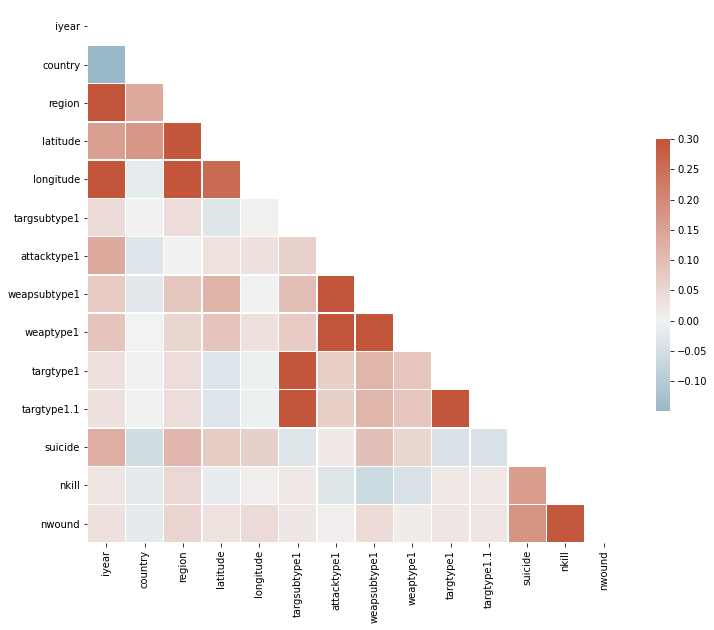

In [ ]:
generatehistogram(dataset, 'afterCorr.png')

In [ ]:
# tsne 
tsne = TSNE()


In [ ]:
testData = dataset[0:500]

In [ ]:
testData.shape

(500, 29)

In [ ]:
result = tsne.fit_transform(dataset)

In [ ]:
result.shape

(500, 2)

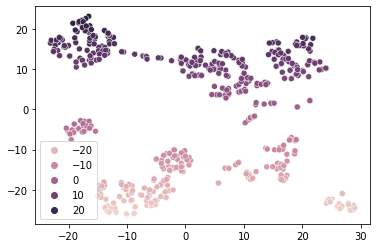

In [ ]:
sns.scatterplot(x=result[:,0], y=result[:,1],hue=result[:,1])

In [ ]:
dataset = run_PCA(dataset, 6)

<class 'pandas.core.frame.DataFrame'>
[0, 1, 2, 3, 4, 5, 6]


In [ ]:
dataset.shape

(155435, 7)

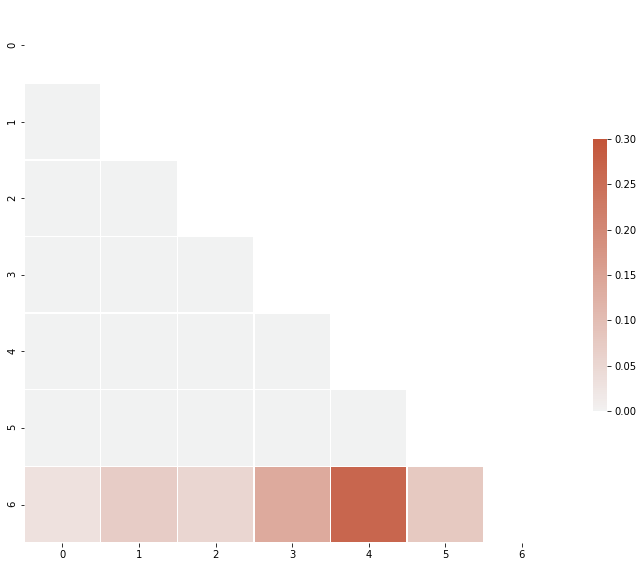

In [ ]:
generatehistogram(dataset, 'afterPca.png')

In [ ]:
files.download('afterCorr.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('afterPca.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dataset

,0,1,2,3,4,5,6
0,-1.954574,-0.397656,0.695714,1.140255,-1.546804,0.647520,0
1,-2.471735,-0.758011,1.122100,0.669170,-1.498040,0.372873,0
2,-2.287468,-0.680553,1.135377,0.573655,-1.446317,0.267488,0
3,-2.329063,1.109866,0.764580,0.626561,-1.600219,0.412863,0
4,-2.459930,-0.625622,1.070789,0.631786,-1.468649,0.297769,0
...,...,...,...,...,...,...,...
155430,0.585699,1.236936,-1.179476,-0.743975,1.709036,-0.455401,0
155431,2.627805,0.606444,-0.629896,-0.914674,2.045497,-0.613791,0
155432,1.006564,-0.796191,-1.045114,-0.413349,1.919665,-0.471981,0
155433,0.898520,-0.617088,-0.918979,-0.089853,2.056450,-0.344782,0


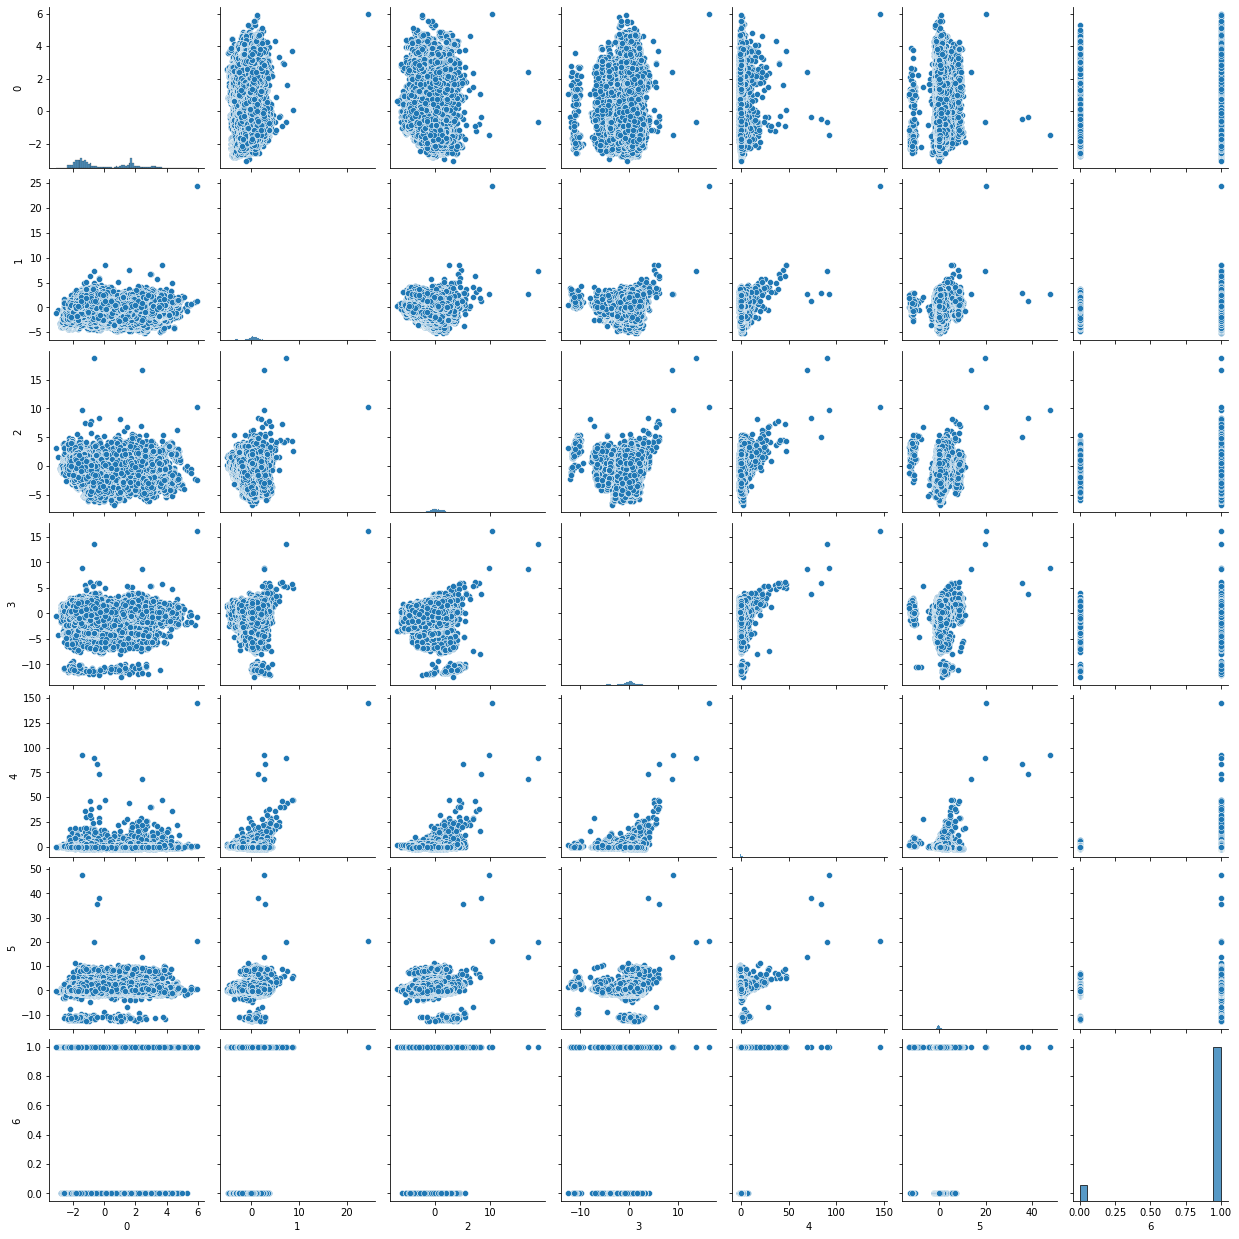

In [ ]:
sns.pairplot(dataset)

In [ ]:
X = dataset.iloc[:, 0:6].values
y = dataset.iloc[:, 6].values

In [ ]:
X.shape

(155435, 6)

In [ ]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
ct = ColumnTransformer([('Geography', OneHotEncoder(), [1]), ('CreditScore', OneHotEncoder(), [2])], remainder='passthrough')
X = ct.fit_transform(X)

In [ ]:
# y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [ ]:
X_train

array([[ 1.71955868, -1.20761771,  0.42836952, -0.04394698,  0.17742279,
        -0.0178984 ],
       [ 0.07940518, -0.67772705,  0.73986739,  0.16141425, -1.09687125,
        -0.44547878],
       [-1.24293218, -0.24020906, -0.48266036, -0.69282601,  1.54535786,
        -0.54864475],
       ...,
       [ 0.67925463, -0.84564945, -0.38741125, -0.0900469 ,  0.4860986 ,
        -0.40590593],
       [ 0.37317752,  0.13357349, -0.11238252,  0.52103892, -2.8403102 ,
        -0.6699817 ],
       [-0.63036045, -1.26648521, -0.08960615,  0.31353046,  0.17103998,
        -0.14682465]])

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# for svm

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the test set results

Y_Pred = classifier.predict(X_test)

print(X_test.shape)
print(y_test.shape, Y_Pred.shape)
c = 0
print(y_test[0])
for i in range (0, y_test.size):
  if y_test[i] == Y_Pred[i]:
    c = c + 1

print("accuracy = " + str((c*100)/y_test.size))

(15544, 6)
(15544,) (15544,)
0
accuracy = 91.86824498198662


(15544, 6)
(15544,) (15544,)
0
accuracy = 91.86824498198662


In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Initialising the ANN
classifier = Sequential()

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 6))

In [ ]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

In [ ]:
# Adding the third hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

In [ ]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [ ]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier

In [ ]:
y_train = y_train.reshape(-1,1)

In [ ]:
y_train.shape

(139891, 1)

In [ ]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)

Epoch 1/10
 4700/13990 [=========>....................] - ETA: 10s - loss: -3.1411 - accuracy: 0.9877

KeyboardInterrupt: ignored

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred = (y_pred > 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[    0,    91,     0],
       [    0, 15402,     0],
       [    0,    51,     0]])

In [ ]:
classifier


In [ ]:
import pickle

In [ ]:
classifier.save('mymodel.h5')

In [ ]:
del classifier

In [ ]:
classifier

NameError: ignored

In [ ]:
from keras.models import load_model

In [ ]:
test_model = load_model('mymodel.h5')

In [ ]:
test_model

In [ ]:
files.download('mymodel.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
newClassifier = svm.SVC(kernel="linear")

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
newClassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = newClassifier.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.9908646423057128